<a href="https://colab.research.google.com/github/ihjeong427/DL23/blob/main/DL_Final_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Natural Language Processing

##1.Wordcloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


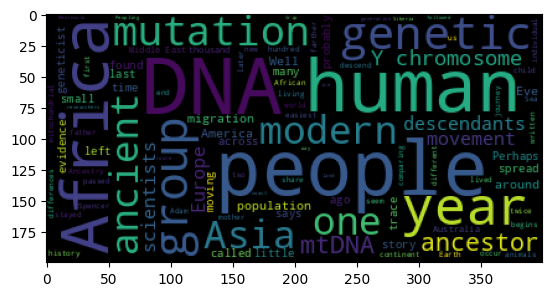

In [6]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import os
import matplotlib.pyplot as plt
nltk.download("punkt")

url = "https://raw.githubusercontent.com/MK316/Class_Spring2022/main/RE.ch05.txt"
os.system("curl " + url + " > RE.ch05.txt")
#@markdown 🌀 read a text file in the server: as _text_
file = open("RE.ch05.txt")
text = file.read().replace("\n", " ")
file.close()

wc = WordCloud().generate(text)
plt.imshow(wc)

Please paste your text here: Two Travellers, walking in the noonday sun, sought the shade of a widespreading tree to rest. As they lay looking up among the pleasant leaves, they saw that it was a Plane Tree.  "How useless is the Plane!" said one of them. "It bears no fruit whatever, and only serves to litter the ground with leaves."  "Ungrateful creatures!" said a voice from the Plane Tree. "You lie here in my cooling shade, and yet you say I am useless! Thus ungratefully, O Jupiter, do men receive their blessings!"


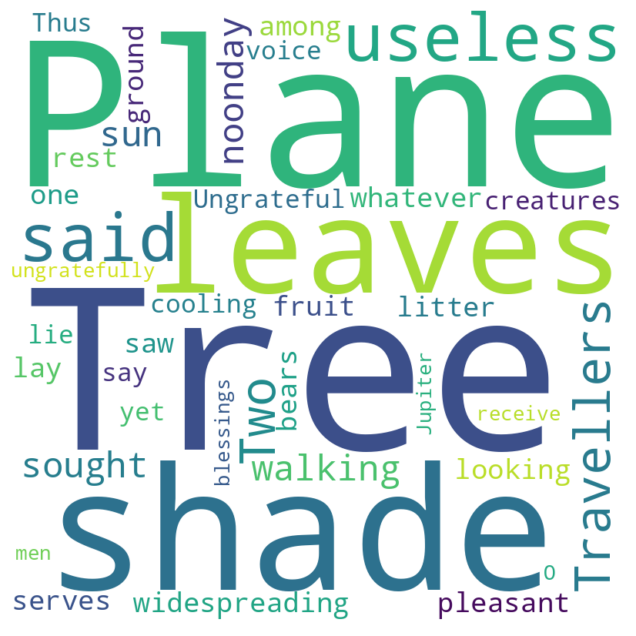

In [8]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Getting text from the user
user_text = input("Please paste your text here: ")


wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=800,
    max_words=100
).generate(user_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##2. Tokenize by words or sentences



*   Tokenize by word (word_tokenize)
*   Tokenize by sentence (sen_tokenize)



In [9]:
example_string = "My name is Inhye. I am a student. I am majoring in English education."

In [10]:
set1=example_string.split() #띄어쓰기를 기준으로 나누어줌
print(set1)

['My', 'name', 'is', 'Inhye.', 'I', 'am', 'a', 'student.', 'I', 'am', 'majoring', 'in', 'English', 'education.']


In [12]:
set2=example_string.split(".") #.을 기준으로 나누어줌
print(set2)

['My name is Inhye', ' I am a student', ' I am majoring in English education', '']


In [13]:
# Strip() 필요 없는 whitespace를 지워줌

set3=[s.strip() for s in set2]
print(set3)

['My name is Inhye', 'I am a student', 'I am majoring in English education', '']


In [17]:
# Remove empty string in a list. 마지막에 나오는 ' '를 없애줌

set4=[x for x in set3 if x != ""] #" "가 아닌 것 (!= 은 다른 것 이라는 뜻 / == 은 같은 것)
print(set4)

set5=[x for x in set3 if x == ""]
print(set5)

['My name is Inhye', 'I am a student', 'I am majoring in English education']
['']


#Using {nltk} library
하나하나 작업하기 귀찮으니 그냥 하나의 library로 만들자.

In [18]:
 from nltk.tokenize import sent_tokenize, word_tokenize

In [20]:
slist=sent_tokenize(example_string)
slist[0] #위에서 설정 했던 example string을 sent_tokenize한 후 첫 번째 문장을 보여주도록 함.

'My name is Inhye.'

In [22]:
mytext=input("Paste text: ")
slist1=sent_tokenize(mytext)
slist1[0]

Paste text: Two Travellers, walking in the noonday sun, sought the shade of a widespreading tree to rest. As they lay looking up among the pleasant leaves, they saw that it was a Plane Tree.  "How useless is the Plane!" said one of them. "It bears no fruit whatever, and only serves to litter the ground with leaves."  "Ungrateful creatures!" said a voice from the Plane Tree. "You lie here in my cooling shade, and yet you say I am useless! Thus ungratefully, O Jupiter, do men receive their blessings!"


'Two Travellers, walking in the noonday sun, sought the shade of a widespreading tree to rest.'

In [23]:
mywords=word_tokenize(mytext)
print(len(mywords)) #입력한 text의 글자 수를 세어줌
mywords[30] #31번째 단어를 보여줌

112


'saw'

#2. Filtering stopwords
stopwords는 in, is, as 처럼 자주 사용되는 단어들. 중요하지 않아서 무시하고 싶은 단어들.

In [29]:
nltk.download("stopwords") #먼저 다운로드 받아줘야 함.
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

sample = "Sir, I protest. I am not a merry man!"
s1=word_tokenize(sample) ; s1 #; s1을 하면 단어들이 세번째줄에 보이고, print(s1) 하면 첫번째 줄에 보임.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

In [32]:
stop_words=set(stopwords.words('english')) #stopwords 중에서도 영어의 stopwords를 뽑아내기 위함
print(stop_words)

{'or', "you've", 'there', 'am', 'don', 'he', 'up', 'own', 'wouldn', "that'll", 'isn', "hadn't", 'but', 'only', 'in', 'further', 'are', 'having', 'nor', "wasn't", 'as', 'at', 'she', 'above', 'was', 'itself', 'very', 'until', 'can', 'their', 'him', 'before', 'each', 'that', 'because', 'any', 'doing', "mustn't", "hasn't", 'just', 'yourselves', 'has', 'if', 'an', 'this', 'been', 'i', 'few', 'more', 'm', 'then', "isn't", 'below', 'between', 'whom', 'off', 'y', 'what', "aren't", 'not', 'mightn', "haven't", 'we', 'a', 'both', 'herself', 'and', 'again', 'hasn', 'into', 'your', 'theirs', 'couldn', 've', 'himself', 'with', 'same', 'be', 'our', "shan't", 'by', 'out', "won't", 'from', 'yours', 'why', "needn't", 'shan', 'them', 'have', "didn't", 's', 'wasn', 'his', 'my', 'ourselves', 'they', 'd', 'shouldn', 'over', 'o', "doesn't", 'after', 'does', 'no', 'needn', 'being', 'did', 'ain', "you're", 'will', 'its', 'most', 'such', 'didn', 'won', "couldn't", 'you', "you'll", 'other', 'yourself', 'the', 't

In [34]:
# string.casefold() : 단어가 대문자인지 소문자인지 상관 없도록 하기 위함

w1="Mary"
w2="SUSAN"
w1.casefold()
w2.casefold()

'susan'

In [38]:
# Remove punctuations and stopwords

filtered_list=[] # 단어들을 담을 리스트를 만듦
for word in s1:
  if (word.casefold() not in stop_words) & (len(word)>1): #대소문자 상관 없이, stopwords가 아니고, 단어의 길이가 1 이상인 것들
    filtered_list.append(word) #그런 단어를 하나하나 리스트에 넣어라

print(filtered_list)

['Sir', 'protest', 'merry', 'man']


#♒ Test wordclouds with / without stopwords

Please paste your text here: Two Travellers, walking in the noonday sun, sought the shade of a widespreading tree to rest. As they lay looking up among the pleasant leaves, they saw that it was a Plane Tree.  "How useless is the Plane!" said one of them. "It bears no fruit whatever, and only serves to litter the ground with leaves."  "Ungrateful creatures!" said a voice from the Plane Tree. "You lie here in my cooling shade, and yet you say I am useless! Thus ungratefully, O Jupiter, do men receive their blessings!"


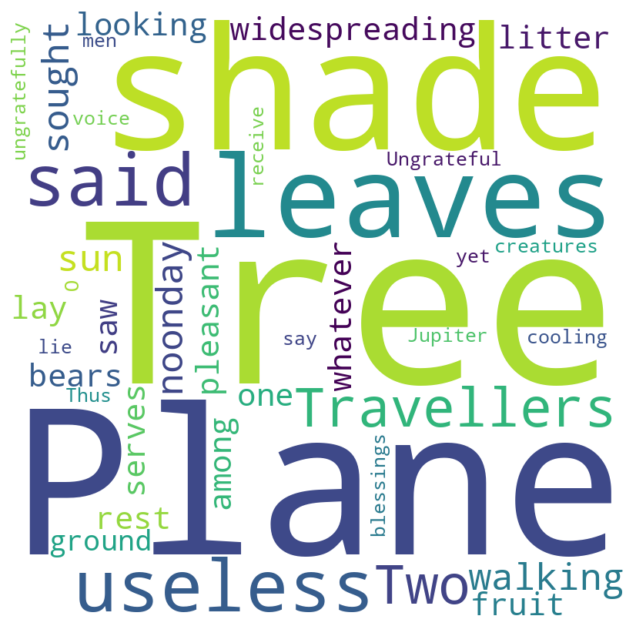

In [39]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Getting text from the user
user_text = input("Please paste your text here: ")


wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=800,
    max_words=100
).generate(user_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [63]:
text1 = """
Once upon a time, there was a kind and adventurous boy named Jack. Jack loved exploring and going on exciting adventures. One day, Jack decided to go on a hike in the nearby forest. As he was walking, he heard a soft meowing sound.

Jack followed the sound and found a small, black kitten. The kitten was scared and alone. Jack picked up the kitten and carried her in his arms. He decided to take her home and give her a warm place to sleep and plenty of food to eat.

Jack named the kitten Luna, and she quickly became his best friend. They did everything together, playing in the park, exploring the woods, and snuggling up together to watch movies at night.

One day, Jack and Luna went on a hike and got lost. They wandered deeper and deeper into the woods, but they couldn't find their way back. Jack started to worry, but Luna stayed by his side, meowing softly to comfort him.

As they continued to wander, they stumbled upon a clearing where an old man was sitting by a campfire. The old man welcomed them and gave them food and water. Jack explained that they were lost, and the old man offered to help them find their way home.

The old man took them on a journey through the woods, showing them which paths to take and which to avoid. Finally, they arrived back at Jack's house, safe and sound.

From that day forward, Jack and Luna never went on another adventure without the old man's guidance. They were grateful to have each other and to have made a new friend who could help them when they needed it most.
"""

In [64]:
w1 = word_tokenize(text1)
stop_words = set(stopwords.words('english'))

w2 = [w for w in w1 if w.lower() not in stop_words and len(w) > 2]
w2

['upon',
 'time',
 'kind',
 'adventurous',
 'boy',
 'named',
 'Jack',
 'Jack',
 'loved',
 'exploring',
 'going',
 'exciting',
 'adventures',
 'One',
 'day',
 'Jack',
 'decided',
 'hike',
 'nearby',
 'forest',
 'walking',
 'heard',
 'soft',
 'meowing',
 'sound',
 'Jack',
 'followed',
 'sound',
 'found',
 'small',
 'black',
 'kitten',
 'kitten',
 'scared',
 'alone',
 'Jack',
 'picked',
 'kitten',
 'carried',
 'arms',
 'decided',
 'take',
 'home',
 'give',
 'warm',
 'place',
 'sleep',
 'plenty',
 'food',
 'eat',
 'Jack',
 'named',
 'kitten',
 'Luna',
 'quickly',
 'became',
 'best',
 'friend',
 'everything',
 'together',
 'playing',
 'park',
 'exploring',
 'woods',
 'snuggling',
 'together',
 'watch',
 'movies',
 'night',
 'One',
 'day',
 'Jack',
 'Luna',
 'went',
 'hike',
 'got',
 'lost',
 'wandered',
 'deeper',
 'deeper',
 'woods',
 'could',
 "n't",
 'find',
 'way',
 'back',
 'Jack',
 'started',
 'worry',
 'Luna',
 'stayed',
 'side',
 'meowing',
 'softly',
 'comfort',
 'continued',
 'wan

In [65]:
additional_stopwords = {'one', 'day', 'upon'}

# stopwords에 추가 해줌
stop_words = set(stopwords.words('english') + list(additional_stopwords))

In [66]:
w1 = word_tokenize(text1)
stop_words = set(stopwords.words('english') + list(additional_stopwords))

w2 = [w for w in w1 if w.lower() not in stop_words and len(w) > 2]
w2

['time',
 'kind',
 'adventurous',
 'boy',
 'named',
 'Jack',
 'Jack',
 'loved',
 'exploring',
 'going',
 'exciting',
 'adventures',
 'Jack',
 'decided',
 'hike',
 'nearby',
 'forest',
 'walking',
 'heard',
 'soft',
 'meowing',
 'sound',
 'Jack',
 'followed',
 'sound',
 'found',
 'small',
 'black',
 'kitten',
 'kitten',
 'scared',
 'alone',
 'Jack',
 'picked',
 'kitten',
 'carried',
 'arms',
 'decided',
 'take',
 'home',
 'give',
 'warm',
 'place',
 'sleep',
 'plenty',
 'food',
 'eat',
 'Jack',
 'named',
 'kitten',
 'Luna',
 'quickly',
 'became',
 'best',
 'friend',
 'everything',
 'together',
 'playing',
 'park',
 'exploring',
 'woods',
 'snuggling',
 'together',
 'watch',
 'movies',
 'night',
 'Jack',
 'Luna',
 'went',
 'hike',
 'got',
 'lost',
 'wandered',
 'deeper',
 'deeper',
 'woods',
 'could',
 "n't",
 'find',
 'way',
 'back',
 'Jack',
 'started',
 'worry',
 'Luna',
 'stayed',
 'side',
 'meowing',
 'softly',
 'comfort',
 'continued',
 'wander',
 'stumbled',
 'clearing',
 'old',
 

#3. Tagging Parts of Speech (POS tagging)

In [68]:
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')

sentence = input("Type your sentence: ")
mywords = word_tokenize(sentence) #Tokenize 먼저 해줘야함. POS 찾을 수 있도록
nltk.pos_tag(mywords) #입력값에 넣었던 단어들의 POS를 하나하나 나오게 하기 위함

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Type your sentence: You lie here in my cooling shade, and yet you say I am useless


[('You', 'PRP'),
 ('lie', 'VBP'),
 ('here', 'RB'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('cooling', 'NN'),
 ('shade', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('yet', 'RB'),
 ('you', 'PRP'),
 ('say', 'VBP'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('useless', 'JJ')]

In [70]:
nltk.download('tagsets')
# nltk.help.upenn_tagset()
#All the words in the quote are now in a separate tuple, with a tag that represents their part of speech. But what do the tags mean? Here’s how to get a list of tags and their meanings:

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [72]:
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

In [73]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [75]:
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

In [78]:
import nltk

# Define some plain text / text 설정하기
text = input("Paste your text: ")

# Tokenize the text into a list of words / 단어 기준으로 나누기
tokens = nltk.word_tokenize(text)

# Create an nltk.Text object from the list of tokens
text_object = nltk.Text(tokens)

# Use the concordance method to find occurrences of the word "fox" / concordance를 쓰면 그 text 안에 이 단어가 얼마나 / 어디에 나오는지 알 수 있음
text_object.concordance("fox")

Paste your text: The DNA trail Everybody loves a good story, and when it's finished, this may be the greatest one ever told. It begins in Africa with a group of people. There are perhaps just a few hundred, surviving by hunting animals and gathering fruits, vegetables, and nuts. It ends about 200,000 years later, with their seven billion descendants spread across the Earth.  In between is an exciting tale of survival, movement, isolation, and conquest, most of it occurring before recorded history. Who were those first modern people in Africa? What routes did they take when they left their home continent to expand into Europe and Asia? When and how did humans reach the Americas? For decades, the only proof was found in a small number of scattered bones and artifacts that our ancestors had left behind. In the past 20 years, however, DNA technologies have allowed scientists to find a record of ancient human migrations in the DNA of living people.  Tracing Ancestry in DNA.  "Every drop of 

#4. Frequency list

Getting word prequency

In [79]:
# word_tokenize: separating punctuation as individual word items
words = word_tokenize(text)

# Without punctuation:
wordlist = []

for w in words:
  if len(w) > 2:
    wordlist.append(w)

print('Total words including punctuation: ', len(words))
print('Total words: ', len(wordlist))
print(wordlist)

Total words including punctuation:  1154
Total words:  827
['The', 'DNA', 'trail', 'Everybody', 'loves', 'good', 'story', 'and', 'when', 'finished', 'this', 'may', 'the', 'greatest', 'one', 'ever', 'told', 'begins', 'Africa', 'with', 'group', 'people', 'There', 'are', 'perhaps', 'just', 'few', 'hundred', 'surviving', 'hunting', 'animals', 'and', 'gathering', 'fruits', 'vegetables', 'and', 'nuts', 'ends', 'about', '200,000', 'years', 'later', 'with', 'their', 'seven', 'billion', 'descendants', 'spread', 'across', 'the', 'Earth', 'between', 'exciting', 'tale', 'survival', 'movement', 'isolation', 'and', 'conquest', 'most', 'occurring', 'before', 'recorded', 'history', 'Who', 'were', 'those', 'first', 'modern', 'people', 'Africa', 'What', 'routes', 'did', 'they', 'take', 'when', 'they', 'left', 'their', 'home', 'continent', 'expand', 'into', 'Europe', 'and', 'Asia', 'When', 'and', 'how', 'did', 'humans', 'reach', 'the', 'Americas', 'For', 'decades', 'the', 'only', 'proof', 'was', 'found',

In [80]:
# Lower case
lowerword = []

for w in wordlist:
  w1 = w.lower()
  lowerword.append(w1)
print(lowerword)

words = lowerword
print("Word size before stopwords: ", len(words))

['the', 'dna', 'trail', 'everybody', 'loves', 'good', 'story', 'and', 'when', 'finished', 'this', 'may', 'the', 'greatest', 'one', 'ever', 'told', 'begins', 'africa', 'with', 'group', 'people', 'there', 'are', 'perhaps', 'just', 'few', 'hundred', 'surviving', 'hunting', 'animals', 'and', 'gathering', 'fruits', 'vegetables', 'and', 'nuts', 'ends', 'about', '200,000', 'years', 'later', 'with', 'their', 'seven', 'billion', 'descendants', 'spread', 'across', 'the', 'earth', 'between', 'exciting', 'tale', 'survival', 'movement', 'isolation', 'and', 'conquest', 'most', 'occurring', 'before', 'recorded', 'history', 'who', 'were', 'those', 'first', 'modern', 'people', 'africa', 'what', 'routes', 'did', 'they', 'take', 'when', 'they', 'left', 'their', 'home', 'continent', 'expand', 'into', 'europe', 'and', 'asia', 'when', 'and', 'how', 'did', 'humans', 'reach', 'the', 'americas', 'for', 'decades', 'the', 'only', 'proof', 'was', 'found', 'small', 'number', 'scattered', 'bones', 'and', 'artifacts

In [ ]:
# Stop words to remove

from nltk.corpus import stopwords
nltk.download('stopwords')
print("Word size before stopwords: ", len(words))
print(words)

print("="*50)
words2 = [w for w in words if w not in stopwords.words('english')]
print(words2)
print("Word size after removing stopwords: ", len(words2))

nltk.FreqDist(wordlist)

In [82]:
fd = nltk.FreqDist(text)
fd
print('Word type: %d'%len(fd),'개')

fwords = nltk.FreqDist(text).most_common()
print(fwords[:5])

Word type: 65 개
[(' ', 1032), ('e', 594), ('a', 418), ('t', 413), ('o', 362)]


In [83]:
# One time occurrences:
freq_num1 = [item[1] for item in fwords]
num1 = freq_num1.count(1);
print('Number of words that occur only once: %d'%num1)
print('The rest: %d'%(213-num1))

# nth word that occurs more than 2
i=0
for n in freq_num1:
  if n >2:
#    print(n)
    i += 1
print('몇 번째 단어까지 2회 초과 빈도? %d'%i, '번째')

Number of words that occur only once: 10
The rest: 203
몇 번째 단어까지 2회 초과 빈도? 50 번째


In [84]:
# Words that occur more than twice
fwords = nltk.FreqDist(text).most_common(20)
fwords

[(' ', 1032),
 ('e', 594),
 ('a', 418),
 ('t', 413),
 ('o', 362),
 ('n', 347),
 ('s', 319),
 ('i', 305),
 ('r', 281),
 ('h', 224),
 ('l', 192),
 ('d', 175),
 ('c', 158),
 ('m', 128),
 ('u', 122),
 ('f', 111),
 ('p', 95),
 ('g', 80),
 ('y', 74),
 ('w', 63)]

Write a csv file

In [86]:
# Write the frequency list as csv file
import csv
fwords = nltk.FreqDist(text).most_common()

List_columns = ['Word', 'Freqeuncy']
List_rows = fwords
with open('Ch02_wordlist.csv', 'w') as csvfile:
    write = csv.writer(csvfile)
    write.writerow(List_columns)
    write.writerows(List_rows)

In [87]:
import pandas as pd

df = pd.read_csv("Ch02_wordlist.csv")
df

,Word,Freqeuncy
0,,1032
1,e,594
2,a,418
3,t,413
4,o,362
...,...,...
60,L,1
61,C,1
62,K,1
63,J,1
